## 1. Importation Libraries

In [1]:
import pandas as pd
import seaborn as snb
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline
from pandas.plotting import parallel_coordinates
import plotly.graph_objects as go
import plotly.express as px
from tpot import TPOTRegressor
from sklearn.model_selection import cross_val_score


C:\Users\adria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


## 2. Data Cleaning

In [2]:
# Read the Stamping data from the Excel file
df = pd.read_excel('Raw_Data_v0.xlsx')

# Cleaning
df = df.drop(columns=['Ref#'])
df['Raw Material'] = df['Raw Material'].str.title()

# Substitute every NaN with 'NA'
df = df.fillna('NA')

In [3]:
all_parts = set()
df["Other assembled RM/Rivet/part"].dropna().str.split(r" \+ ").apply(all_parts.update)

# Creating new columns for each extracted part
for part in all_parts:
    df[part] = df["Other assembled RM/Rivet/part"].apply(lambda x: part in x if pd.notna(x) else False)

df = df.drop(columns=['NA', 'Other assembled RM/Rivet/part'])
df

,Production,Annual target quantity,Raw Material,Raw Material Designation,Surface Treatment,Heat treatment,Raw Material Cost (€/kg),Thickness (mm),Part Net Weight (g),Gross Weight (g),Final Raw Material cost (€/Part),Surface Treatment cost (€/Part),Heat Treatment cost (€/Part),Other RM/Rivet/part cost (€/Part),Total cost with amortization (€/part),Silver foil,Steel part
0,A,1500000.0,Copper,Cu-ETP-R240,NA,NA,9.400663,1.5,3.000,5.773680,0.035346,0.000000,0.0,0.000103,0.051500,True,False
1,A,1000000.0,Copper,Cu-ETP-R240,Sn5,NA,9.804307,1.6,3.200,5.363107,0.038595,0.004970,0.0,0.000103,0.058863,True,False
2,A,1500000.0,Copper,Cu-ETP-R240,Sn5,NA,9.804307,1.3,5.107,9.425666,0.064738,0.006737,0.0,0.000103,0.089343,True,False
3,A,1500000.0,Copper,Cu-ETP-R240,Sn5,NA,9.401325,1.5,3.731,6.602310,0.042341,0.006184,0.0,0.000000,0.057637,False,False
4,A,1500000.0,Steel,DC03,Sn5,NA,1.236886,1.5,3.300,5.816850,0.006726,0.006184,0.0,0.000000,0.018332,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,E,44538.0,Copper,Cu-ETP-R240,NA,NA,9.354414,6.0,0.056,0.123000,0.799868,0.000000,0.0,0.000000,1.538638,False,False
155,E,38260.0,Steel,SUS304 1/2H,NA,NA,3.689065,2.5,0.034,0.056000,0.220553,0.000000,0.0,0.000000,0.353694,False,False
156,E,13478.0,Steel,SPCC-2B,ZnCr3+,NA,1.185771,2.0,0.064,0.154000,0.191041,0.092227,0.0,0.000000,0.648388,False,False
157,E,38260.0,Steel,SPCC-2B,ZnCr3+,NA,1.185771,2.0,0.010,0.020000,0.025296,0.013175,0.0,0.000000,0.097968,False,False


## 3. Analyse Graphique

### 3.1 Matrix de Correlation Lineaire

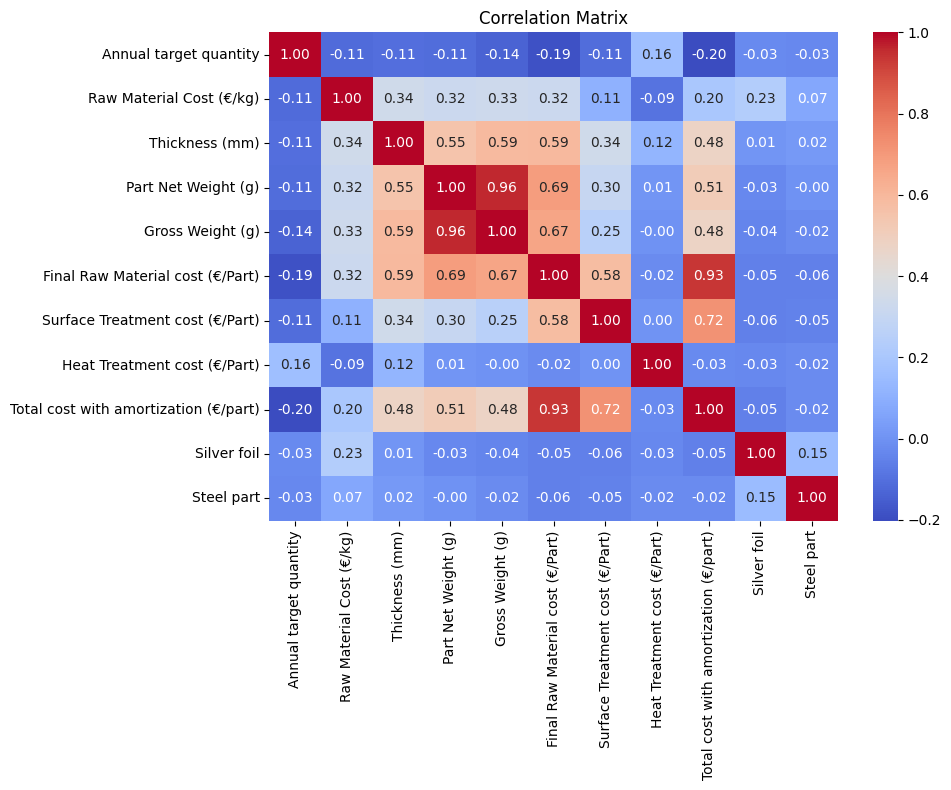

In [4]:
# Select the relevant columns
columns_of_interest = [
    'Annual target quantity', 'Raw Material Cost (€/kg)', 'Thickness (mm)', 
    'Part Net Weight (g)', 'Gross Weight (g)', 'Final Raw Material cost (€/Part)', 
    'Surface Treatment cost (€/Part)', 'Heat Treatment cost (€/Part)', 
    'Total cost with amortization (€/part)', 'Silver foil', 'Steel part'
]

# Calculate the correlation matrix
correlation_matrix = df[columns_of_interest].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

### 3.2 Parallel Coordinates 

In [5]:
fig = px.parallel_coordinates(
    df[columns_of_interest], 
    dimensions=columns_of_interest,
    color=df['Steel part'],  # Color by Steel part
    color_continuous_scale=['blue', 'red'],
    title="Interactive Parallel Coordinates Plot"
)

# Update layout for better visualization
fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    height=600
)

# Show the plot
fig.show()

### 3.3 Scatter Plot

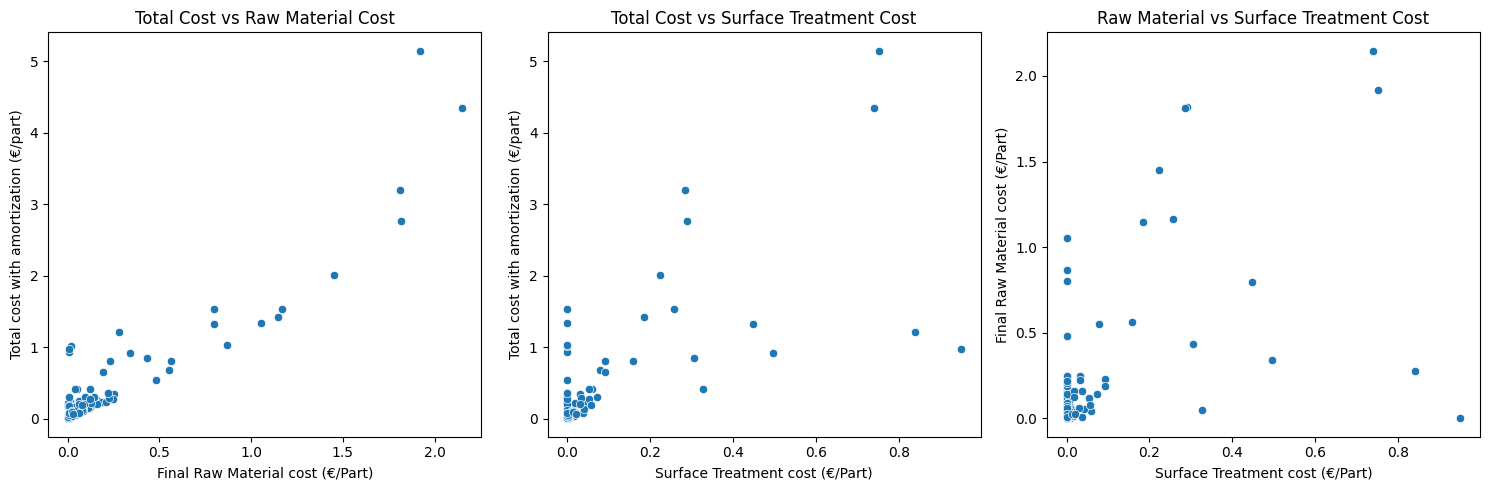

In [6]:
# Create figure with multiple subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Define the variables
cost_vars = [
    "Total cost with amortization (€/part)",
    "Final Raw Material cost (€/Part)",
    "Surface Treatment cost (€/Part)"
]

# Create scatter plots
# Plot 1: Total Cost vs Raw Material Cost
sns.scatterplot(
    data=df,
    x=cost_vars[1],
    y=cost_vars[0],
    ax=axes[0]
)
axes[0].set_title('Total Cost vs Raw Material Cost')

# Plot 2: Total Cost vs Surface Treatment Cost
sns.scatterplot(
    data=df,
    x=cost_vars[2],
    y=cost_vars[0],
    ax=axes[1]
)
axes[1].set_title('Total Cost vs Surface Treatment Cost')

# Plot 3: Raw Material Cost vs Surface Treatment Cost
sns.scatterplot(
    data=df,
    x=cost_vars[2],
    y=cost_vars[1],
    ax=axes[2]
)
axes[2].set_title('Raw Material vs Surface Treatment Cost')

# Adjust layout
plt.tight_layout()
plt.show()

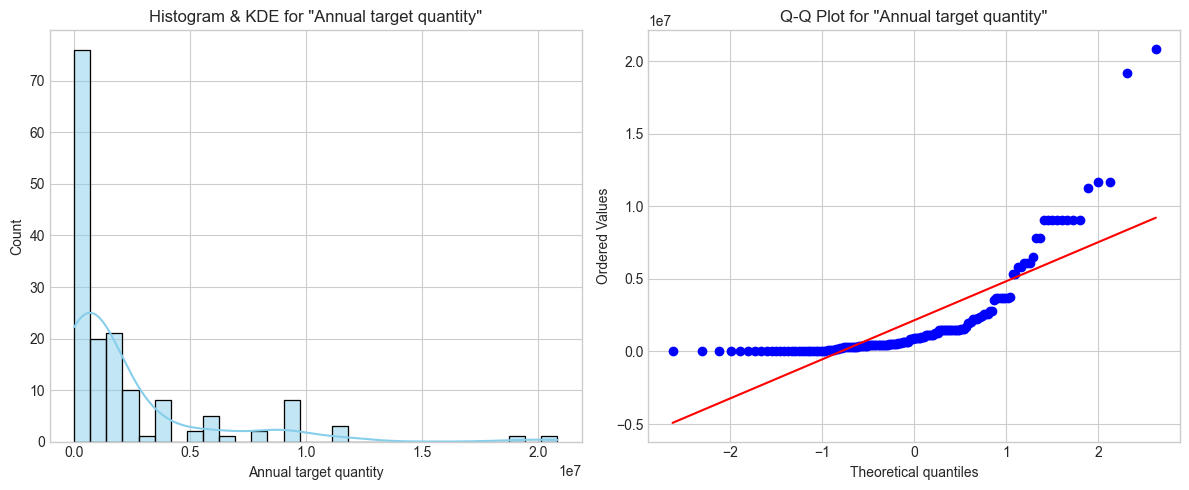

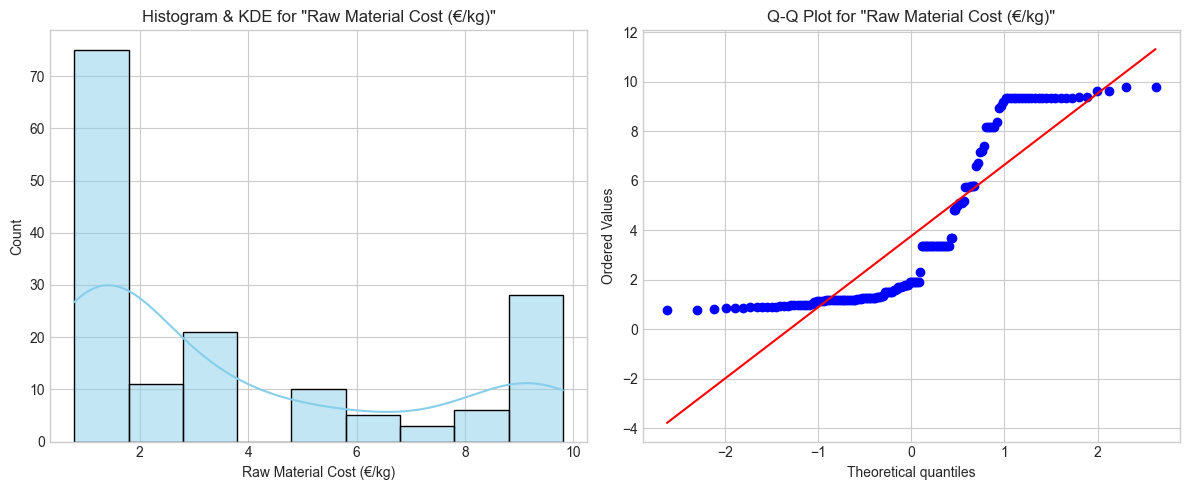

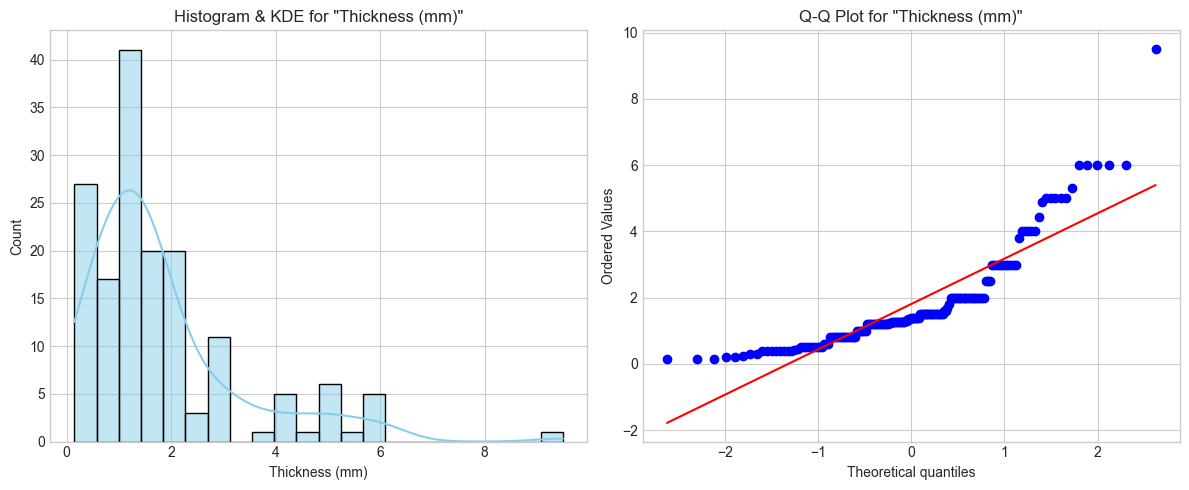

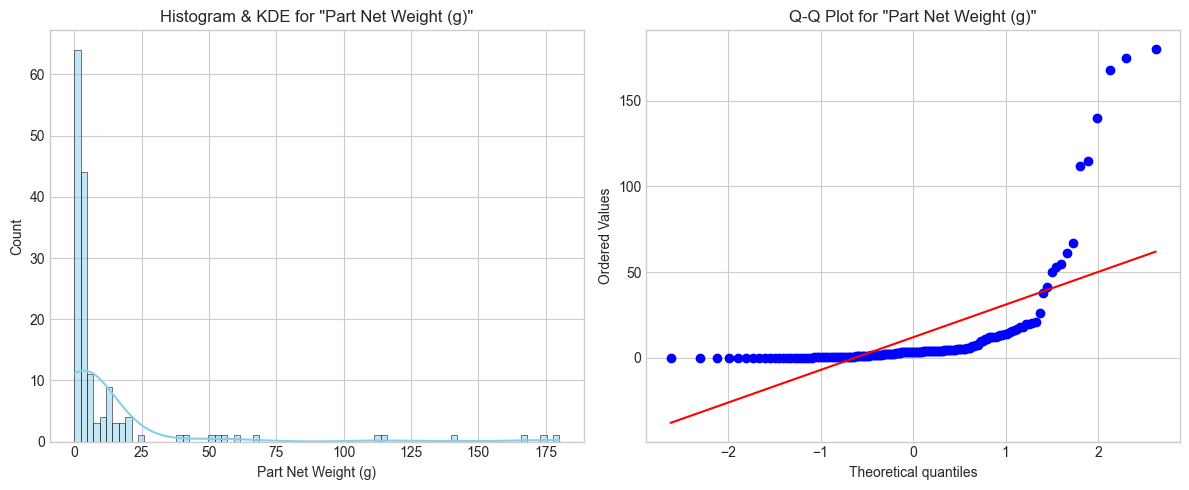

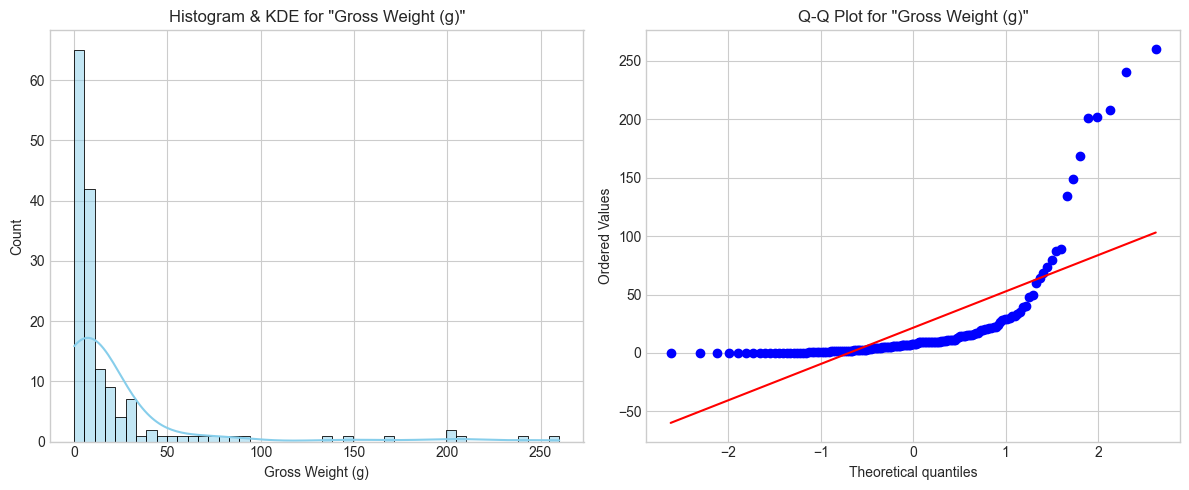

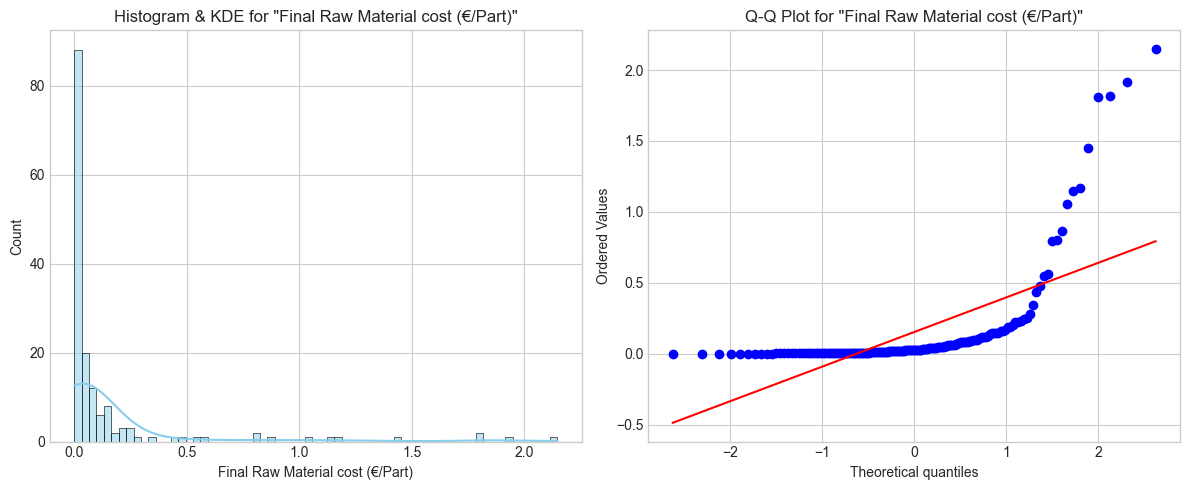

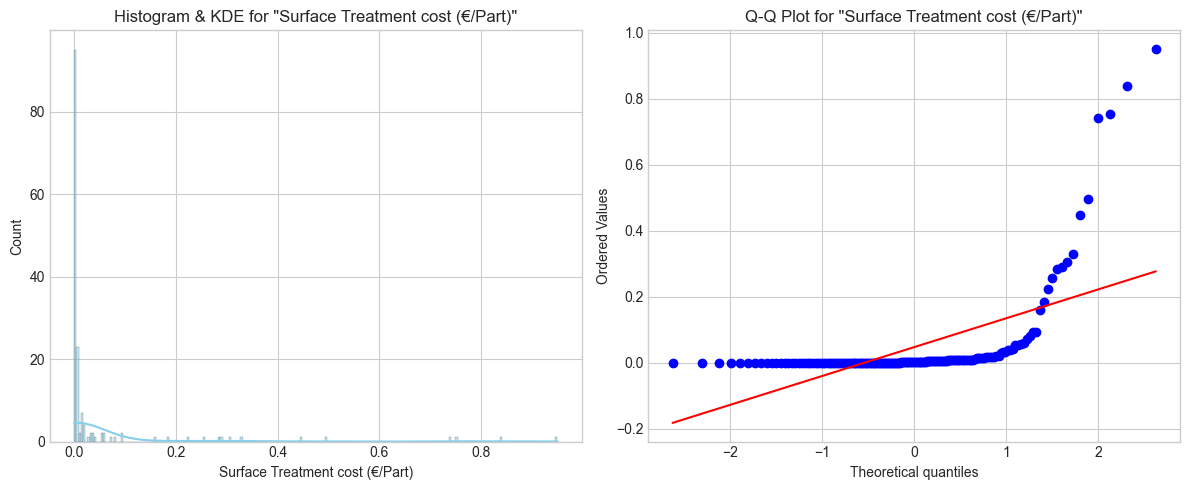

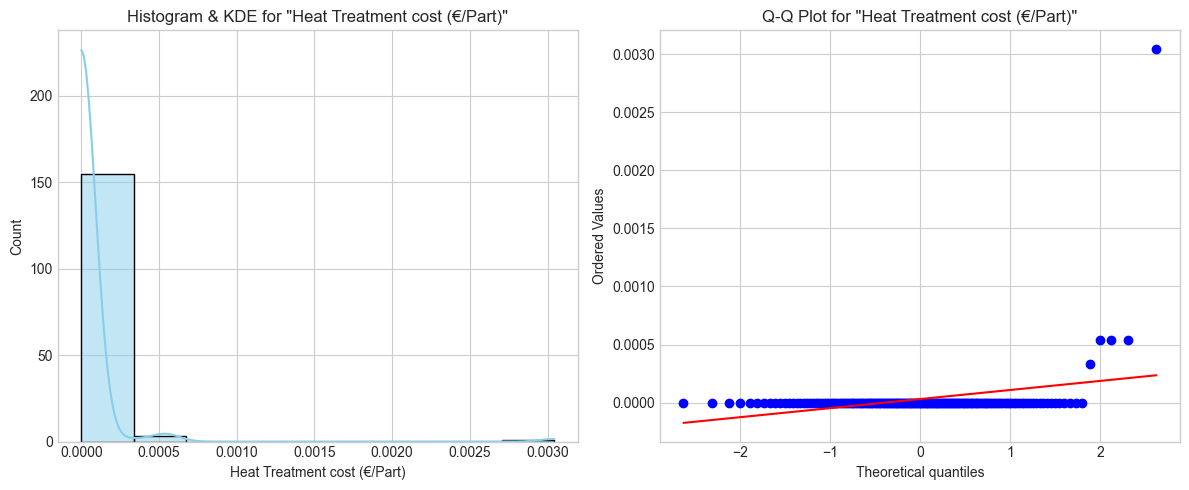

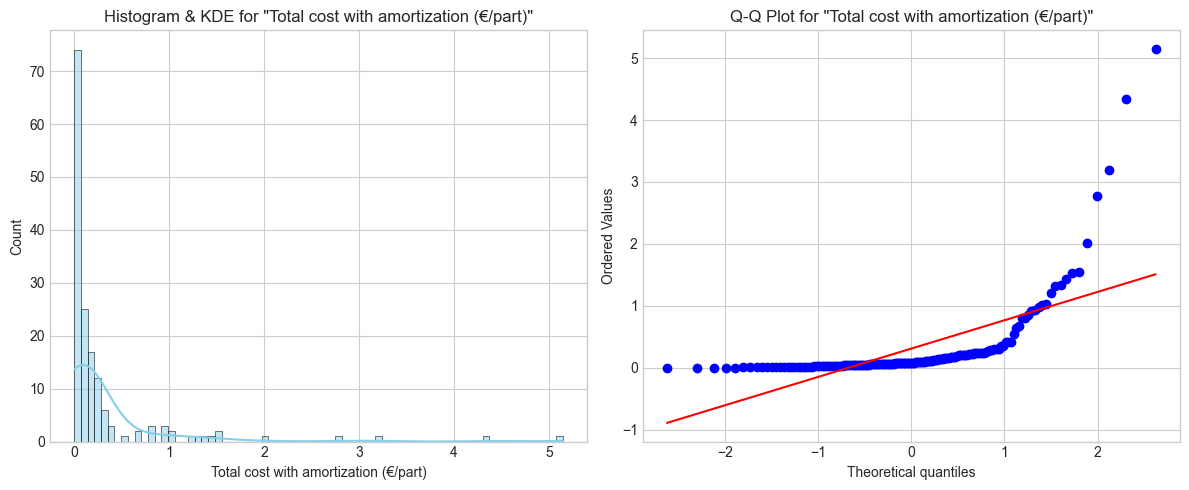

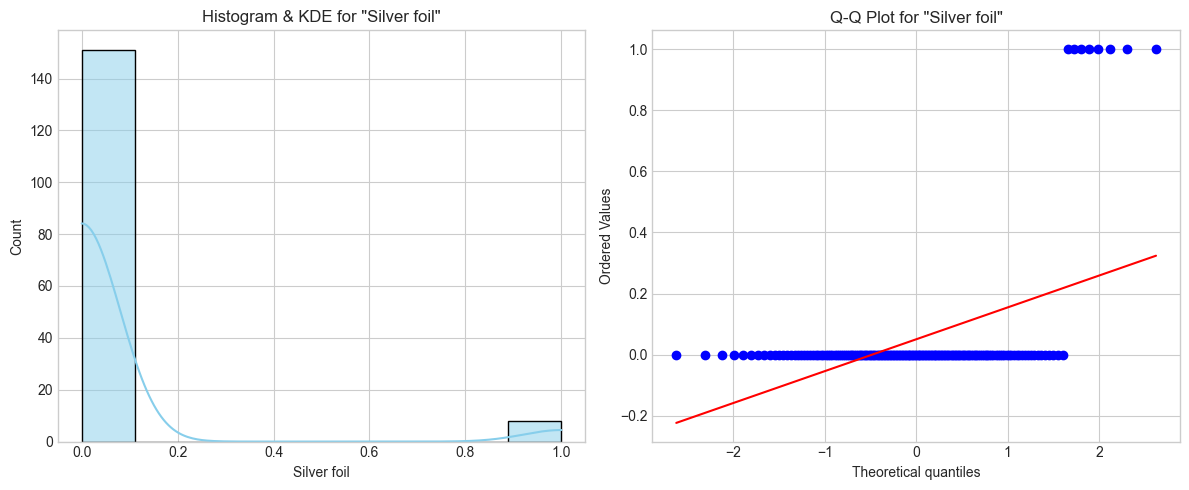

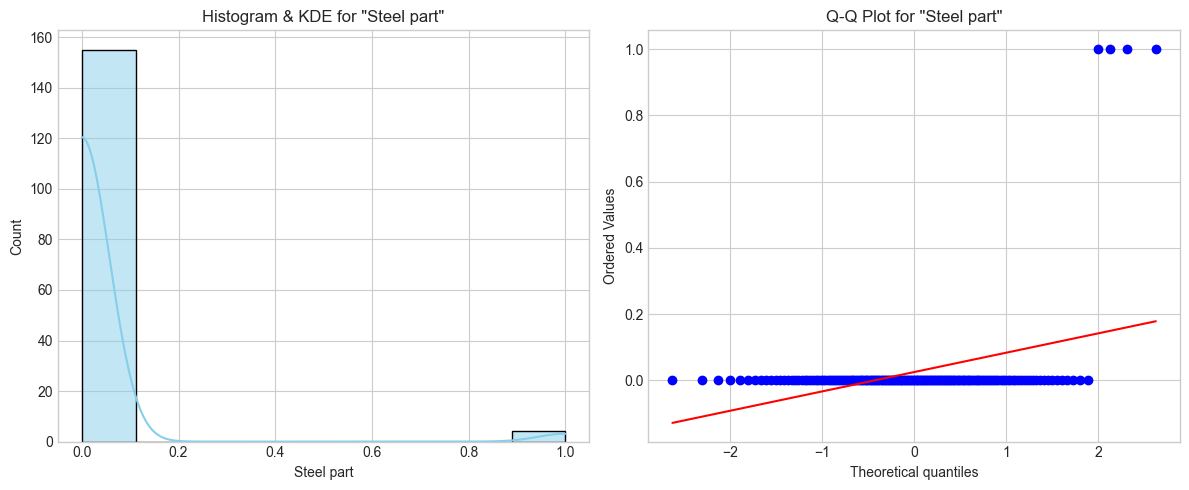

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Ensure your DataFrame is already loaded
# Example: df = pd.read_csv('your_file.csv')

columns_of_interest = [
    'Annual target quantity', 'Raw Material Cost (€/kg)', 'Thickness (mm)', 
    'Part Net Weight (g)', 'Gross Weight (g)', 'Final Raw Material cost (€/Part)', 
    'Surface Treatment cost (€/Part)', 'Heat Treatment cost (€/Part)', 
    'Total cost with amortization (€/part)', 'Silver foil', 'Steel part'
]

for col in columns_of_interest:
    if col in df.columns:
        data = df[col].dropna()  # Drop NaNs for clean analysis

        # Create subplots: Histogram + KDE and Q-Q plot
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Histogram with KDE
        sns.histplot(data, kde=True, ax=axes[0], color='skyblue', edgecolor='black')
        axes[0].set_title(f'Histogram & KDE for "{col}"')

        # Q-Q Plot
        stats.probplot(data, dist="norm", plot=axes[1])
        axes[1].set_title(f'Q-Q Plot for "{col}"')

        plt.tight_layout()
        plt.show()
    else:
        print(f"Column '{col}' not found in the DataFrame.")


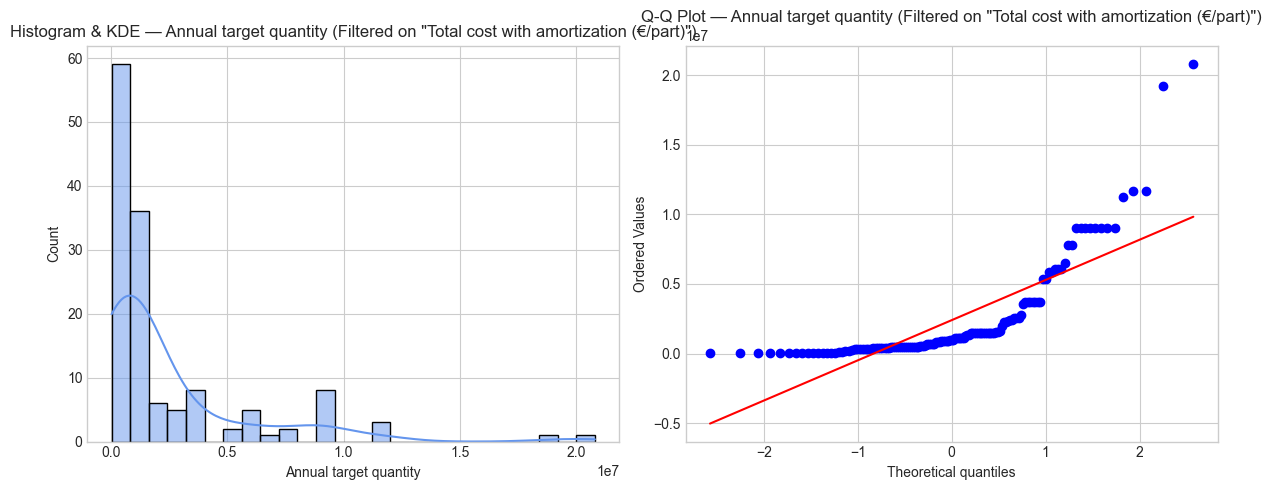

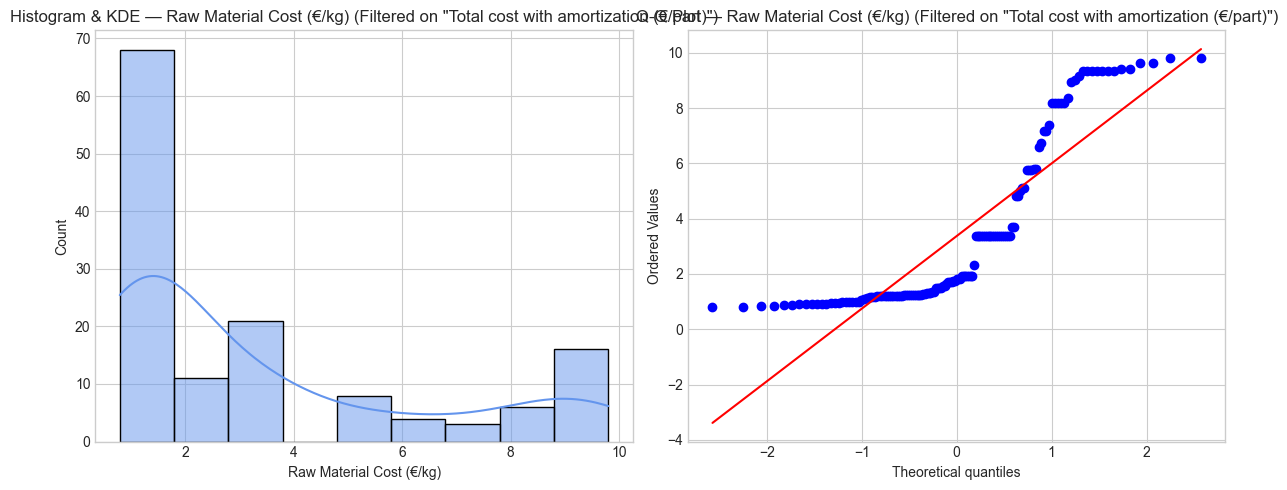

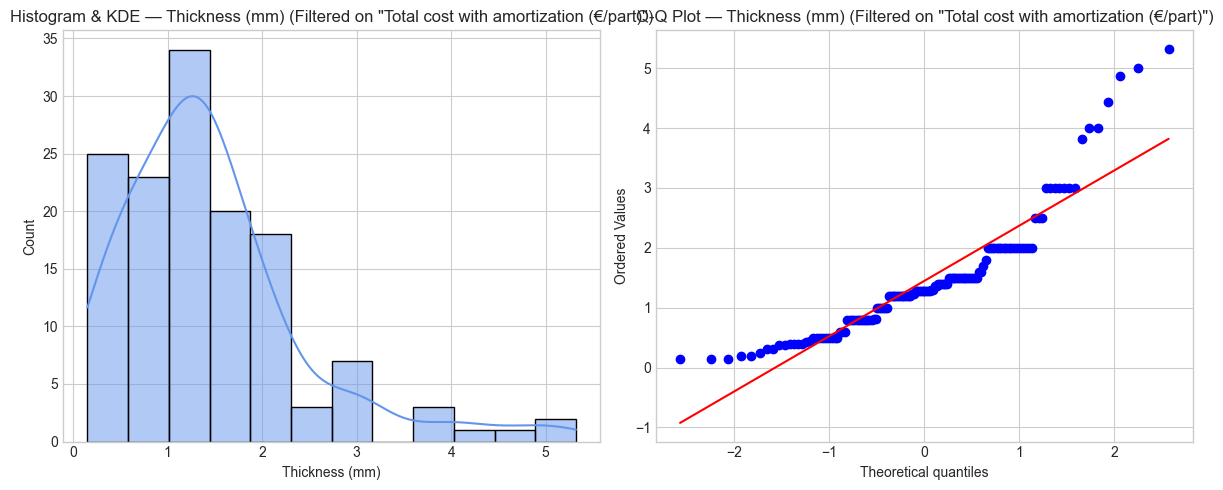

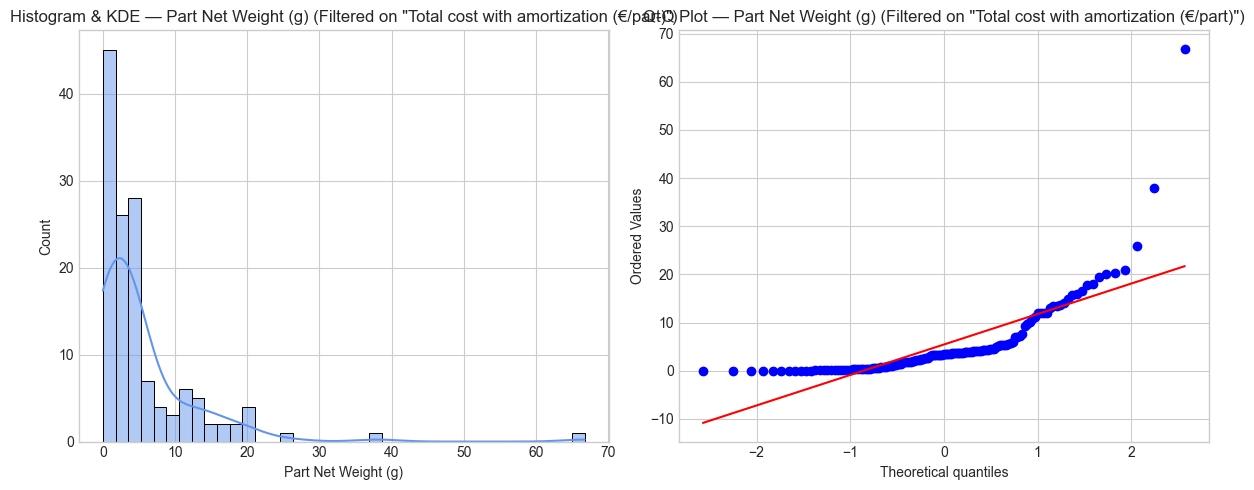

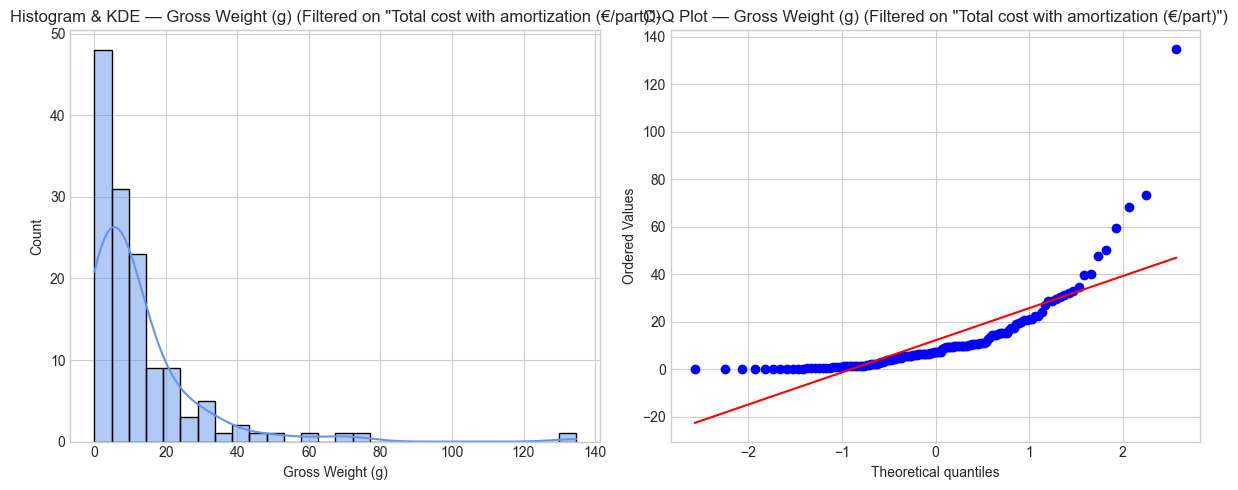

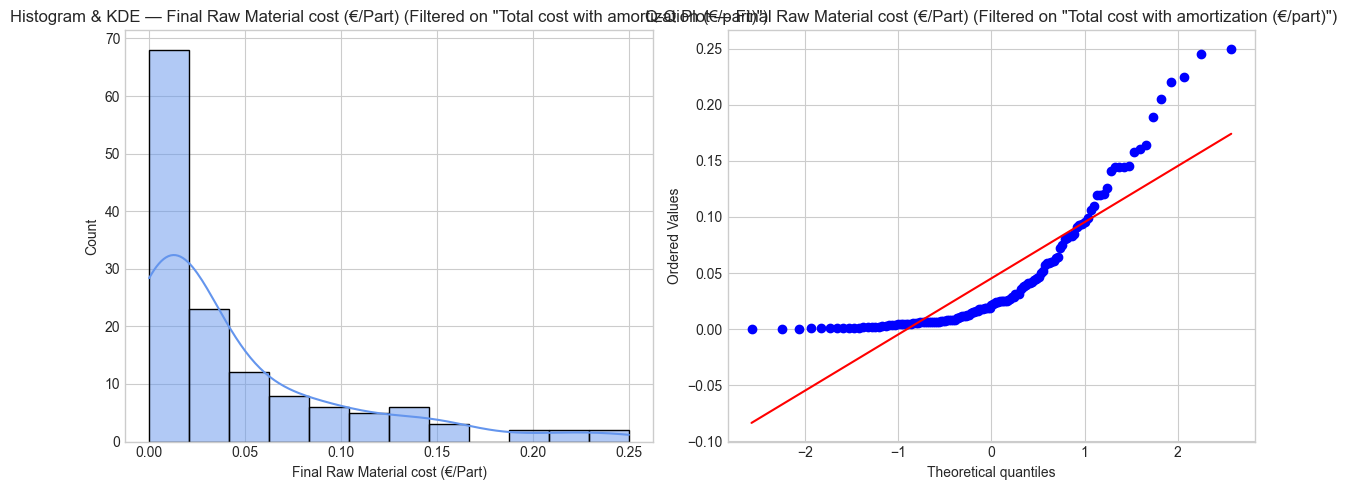

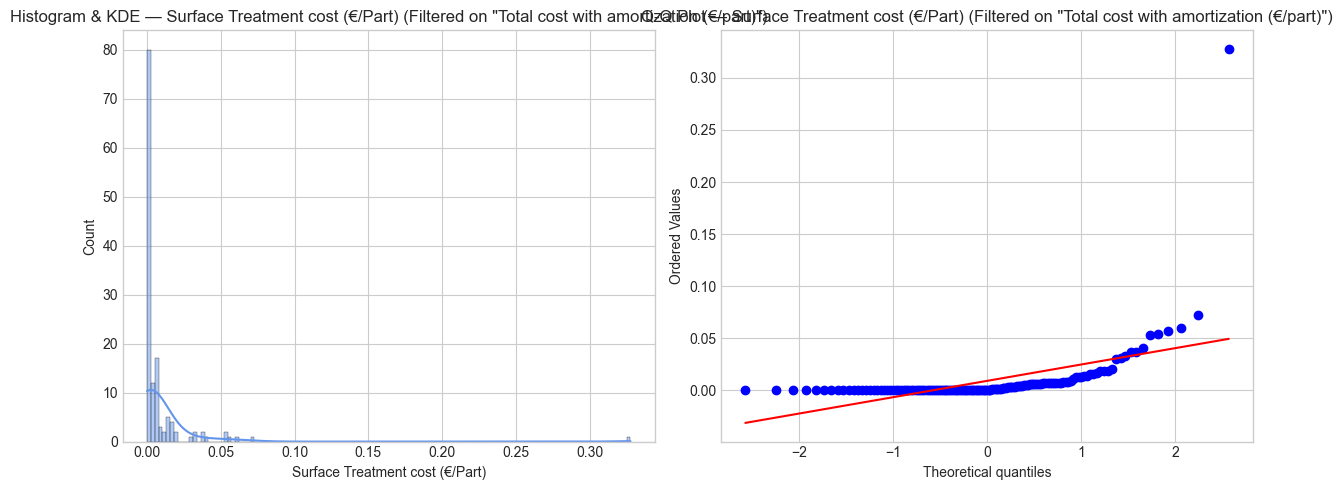

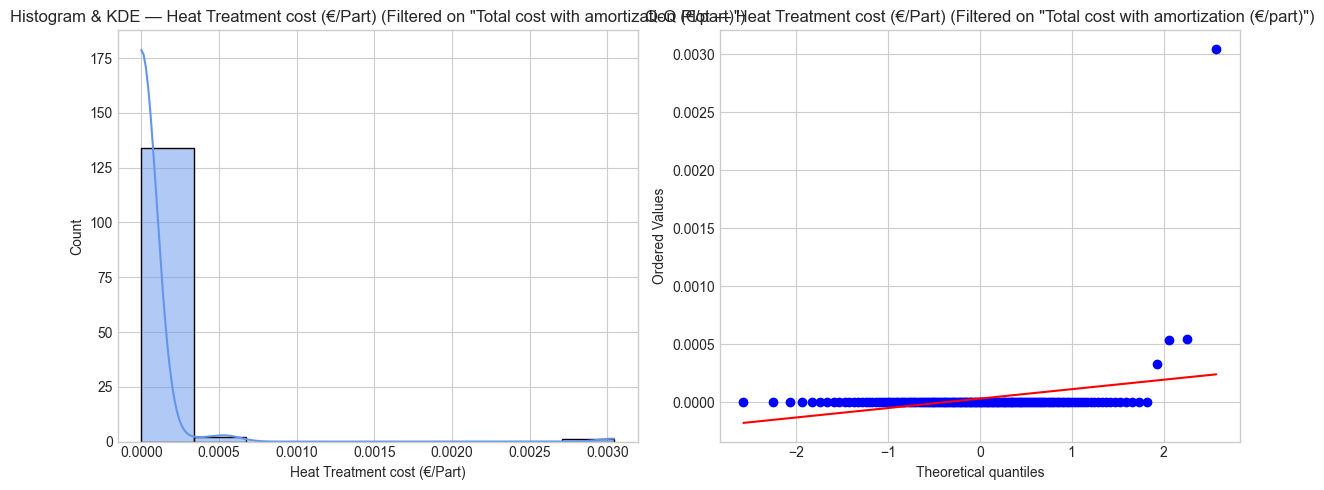

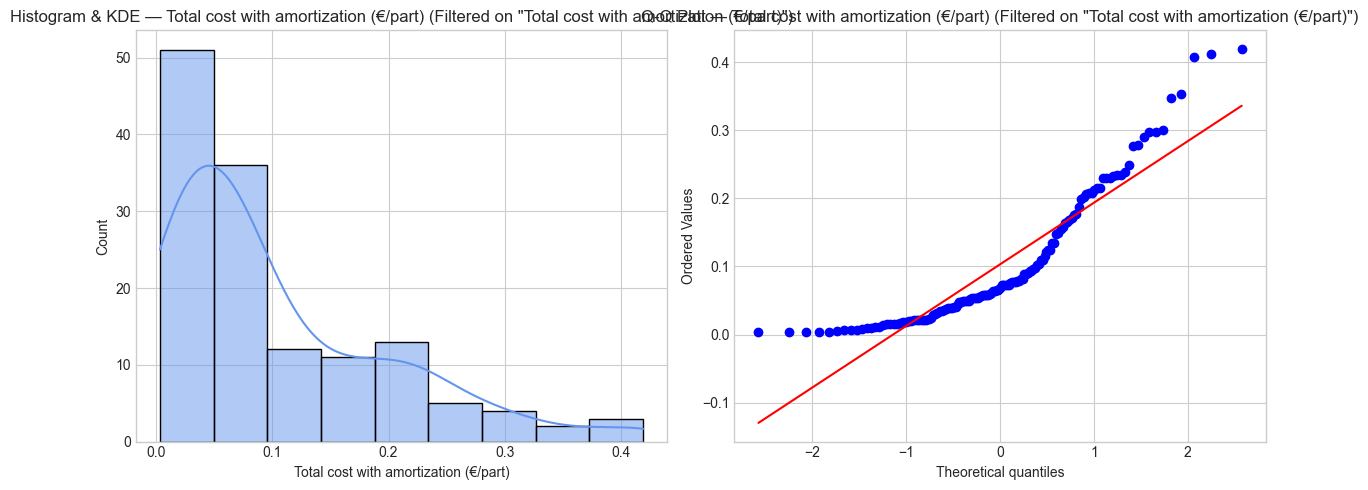

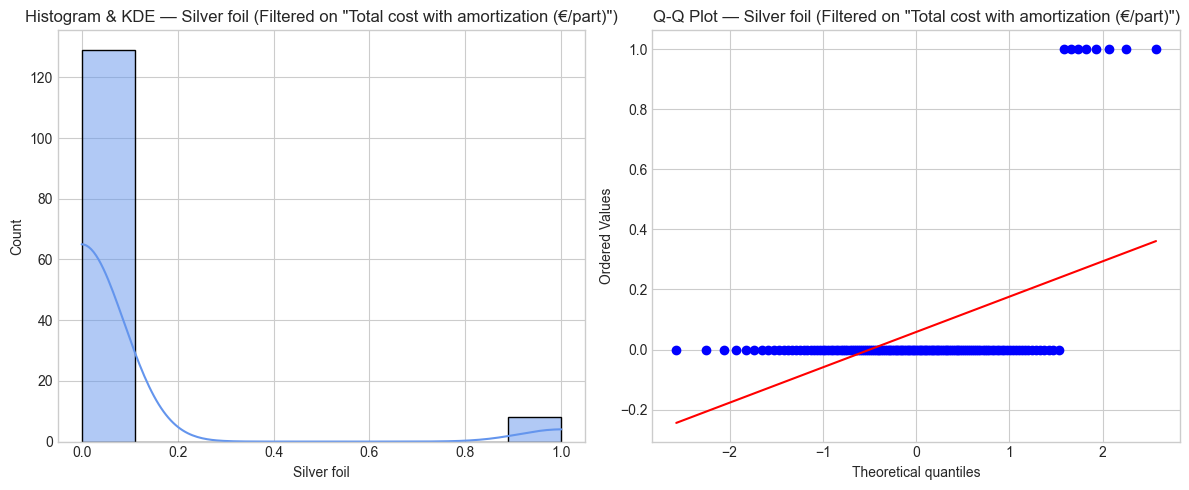

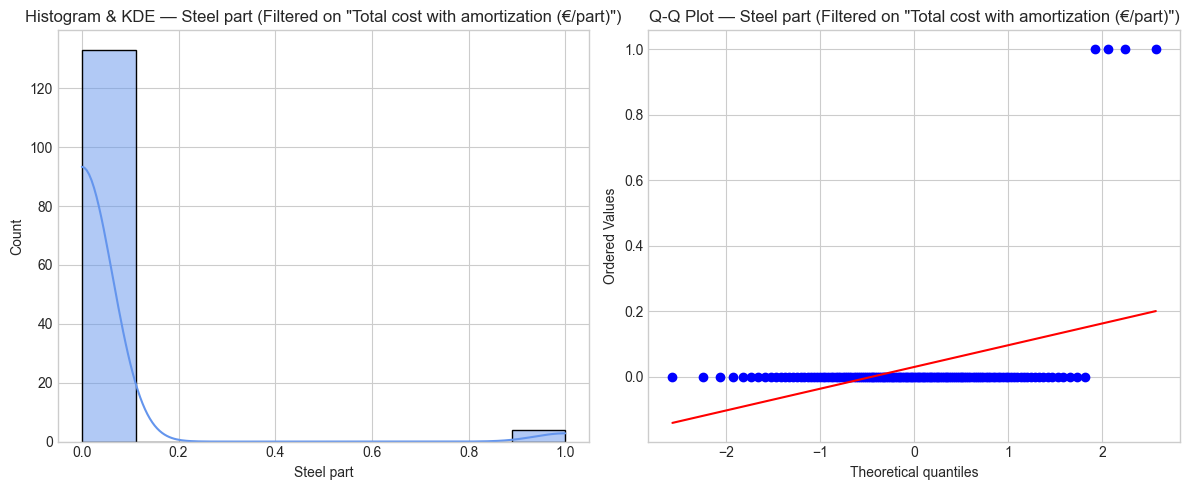

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Column list
columns_of_interest = [
    'Annual target quantity', 'Raw Material Cost (€/kg)', 'Thickness (mm)', 
    'Part Net Weight (g)', 'Gross Weight (g)', 'Final Raw Material cost (€/Part)', 
    'Surface Treatment cost (€/Part)', 'Heat Treatment cost (€/Part)', 
    'Total cost with amortization (€/part)', 'Silver foil', 'Steel part'
]

# Identify and remove outliers only based on 'Total cost with amortization (€/part)'
outlier_col = 'Total cost with amortization (€/part)'

if outlier_col not in df.columns:
    raise ValueError(f"'{outlier_col}' not found in DataFrame.")

# IQR-based outlier removal
q1 = df[outlier_col].quantile(0.25)
q3 = df[outlier_col].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

# Filter rows where 'Total cost with amortization' is not an outlier
df_filtered = df[(df[outlier_col] >= lower) & (df[outlier_col] <= upper)]

# Plot histograms + Q-Q plots for all columns of interest using the filtered data
for col in columns_of_interest:
    if col in df_filtered.columns:
        data = df_filtered[col].dropna()

        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Histogram + KDE
        sns.histplot(data, kde=True, ax=axes[0], color='cornflowerblue', edgecolor='black')
        axes[0].set_title(f'Histogram & KDE — {col} (Filtered on "{outlier_col}")')

        # Q-Q plot
        stats.probplot(data, dist="norm", plot=axes[1])
        axes[1].set_title(f'Q-Q Plot — {col} (Filtered on "{outlier_col}")')

        plt.tight_layout()
        plt.show()
    else:
        print(f"Column '{col}' not found in the DataFrame.")


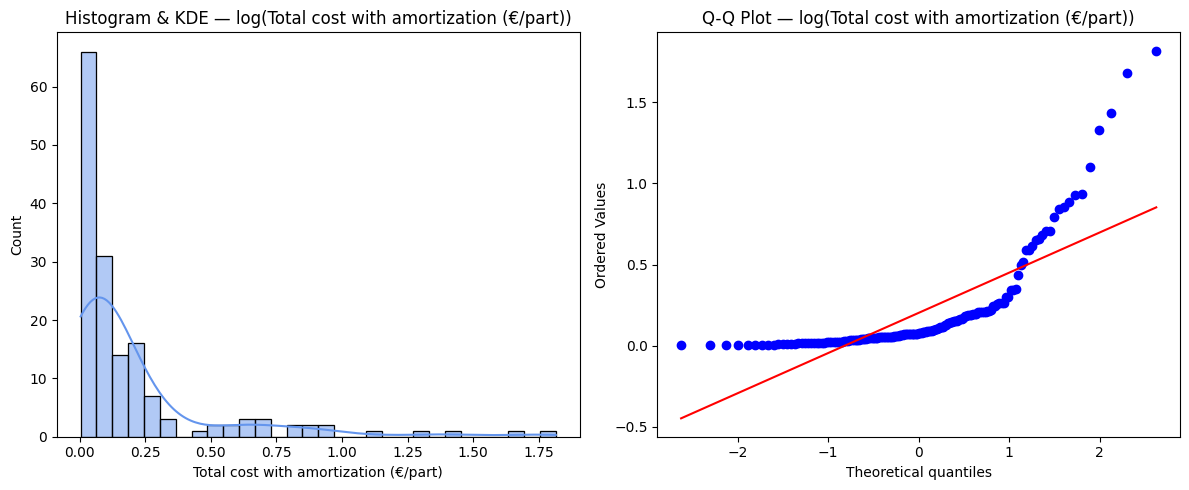

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

# Column to analyze
col = 'Total cost with amortization (€/part)'

# Check if column exists
if col not in df.columns:
    raise ValueError(f"'{col}' not found in DataFrame.")

# Drop NaNs and apply log transformation (log1p handles zeros)
data_log = np.log1p(df[col].dropna())

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram + KDE
sns.histplot(data_log, kde=True, ax=axes[0], color='cornflowerblue', edgecolor='black')
axes[0].set_title(f'Histogram & KDE — log({col})')

# Q-Q plot
stats.probplot(data_log, dist="norm", plot=axes[1])
axes[1].set_title(f'Q-Q Plot — log({col})')

plt.tight_layout()
plt.show()


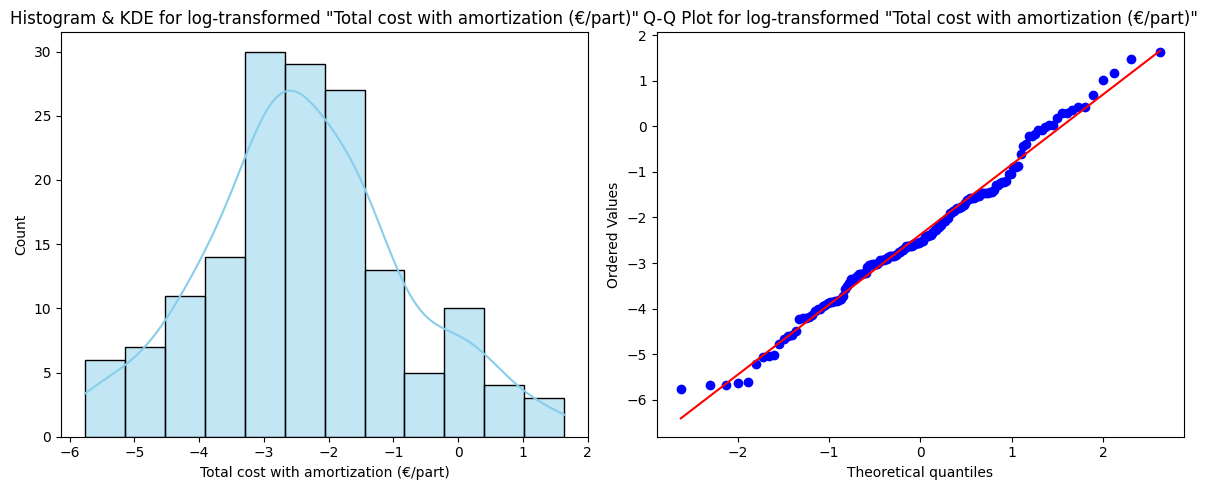

In [5]:
import numpy as np  # Needed for the log function

columns_of_interest = [
    'Total cost with amortization (€/part)'
]

for col in columns_of_interest:
    if col in df.columns:
        data = df[col].dropna()

        # Apply log transformation (add a small constant to avoid log(0))
        log_data = np.log(data + 1e-9)  # or simply np.log1p(data) if you want log(1 + x)

        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Histogram with KDE on log-transformed data
        sns.histplot(log_data, kde=True, ax=axes[0], color='skyblue', edgecolor='black')
        axes[0].set_title(f'Histogram & KDE for log-transformed "{col}"')

        # Q-Q Plot on log-transformed data
        stats.probplot(log_data, dist="norm", plot=axes[1])
        axes[1].set_title(f'Q-Q Plot for log-transformed "{col}"')

        plt.tight_layout()
        plt.show()
    else:
        print(f"Column '{col}' not found in the DataFrame.")


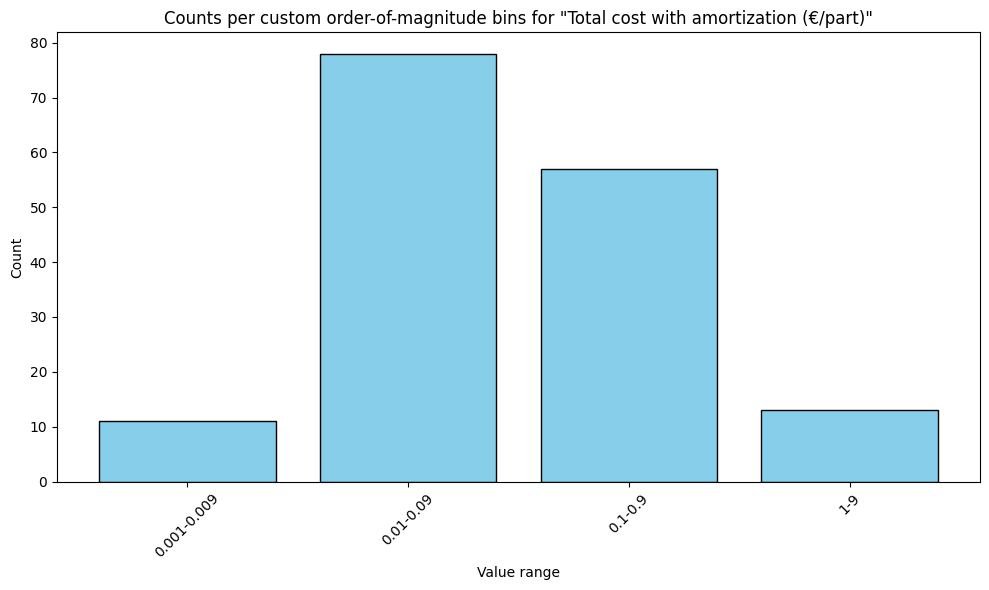

In [7]:
import numpy as np
import matplotlib.pyplot as plt

columns_of_interest = ['Total cost with amortization (€/part)']

for col in columns_of_interest:
    if col in df.columns:
        data = df[col].dropna()
        
        # Filter out zeros and negatives, because the binning starts at 0.01
        positive_data = data[data > 0]
        
        # Find min and max order of magnitude to create bins
        min_order = int(np.floor(np.log10(positive_data.min())))
        max_order = int(np.floor(np.log10(positive_data.max())))
        
        bins = []
        labels = []
        # Create bins like 0.01-0.09, 0.1-0.9, 1-9, 10-90, etc.
        for order in range(min_order, max_order + 1):
            lower = 10**order
            upper = 9 * 10**order
            bins.append(lower)
            labels.append(f'{lower:.2g}-{upper:.2g}')
        bins.append(9 * 10**max_order * 10)  # upper bound for last bin
        
        # Use np.digitize to bin the data
        bin_indices = np.digitize(positive_data, bins, right=True)
        
        # Count samples in each bin
        counts = np.bincount(bin_indices, minlength=len(bins)+1)[1:-1]  # exclude 0 and last overflow bins
        
        # Plot
        plt.figure(figsize=(10, 6))
        plt.bar(labels, counts, color='skyblue', edgecolor='black')
        plt.xlabel('Value range')
        plt.ylabel('Count')
        plt.title(f'Counts per custom order-of-magnitude bins for "{col}"')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        
    else:
        print(f"Column '{col}' not found in the DataFrame.")
